install libraries







In [ ]:
pip install -r requirements.txt

import libraries

In [1]:
from google.cloud import bigquery
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display

create your key_json in GCP and use in this project

In [2]:
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] ="/home/viacheslav/NuxGame/test_task/applied-honor-354909-3a424d1dfcb6.json"

In [3]:
client = bigquery.Client()

I wrote a query to retrieve the following data:
    
    user_pseudo_id - unique user ID
    
    first_created_at - the date when the user first accessed the application
    
    first_event_created_at - the first date for the event
    
    last_event_created_at - the last date for the event
    
    event_date_diff - the difference in days between the first and last occurrence of the same event
    
    event_activity_days - the number of active days when at least 1 event occurred
    
    revenue - total revenue generated by the user over the entire period
    
    event_name - the name of the event that occurred
    
    event_n - the count of specific events


In [4]:
events_data = pd.DataFrame()


query = f"""
WITH events_2018 AS (
  SELECT * FROM `firebase-public-project.analytics_153293282.events_2018*`
)
, transformation_events_data AS (
  SELECT DISTINCT
    user_pseudo_id
    , TIMESTAMP_MICROS(event_timestamp) AS event_created_at
    , event_name
    , TIMESTAMP_MICROS(user_first_touch_timestamp) AS first_event_created_at
    , user_ltv.revenue AS revenue
    , user_ltv.currency AS currency
    , param.key AS event_param_key
    , param.value.string_value AS event_param_value
  FROM events_2018,
  UNNEST(event_params) AS param
)
SELECT DISTINCT
  user_pseudo_id
  , DATE(first_event_created_at) AS first_created_at
  , max(event_created_at) AS last_event_created_at
  , min(event_created_at) AS first_event_created_at
  , DATE_DIFF(max(event_created_at), min(event_created_at), DAY) AS event_date_diff
  , COUNT(DISTINCT DATE(event_created_at)) AS eventevent_activity_day
  , revenue
  , currency
  , event_name
  , COUNT(event_created_at) AS event_n
FROM transformation_events_data
GROUP BY 1, 2, 7, 8, 9
"""
query_job = client.query(query)
df = query_job.to_dataframe()
df.to_csv('events_2018.csv', index=False)

In [5]:
df

,user_pseudo_id,first_created_at,last_event_created_at,first_event_created_at,event_date_diff,eventevent_activity_day,revenue,currency,event_name,event_n
0,F599994183A869707DBC45EDCC6013D8,2016-08-18,2018-09-16 20:07:38.586213+00:00,2018-09-16 19:37:47.053000+00:00,0,1,NaN,None,ad_reward,203
1,4B12ACD507A3752A8CD17C7824BF3851,2018-06-04,2018-09-26 03:20:50.116000+00:00,2018-06-12 12:49:19.526002+00:00,105,6,NaN,None,ad_reward,123
2,709FCE78A03255D6EF6678E1D98783E7,2017-11-22,2018-09-10 03:37:03.399044+00:00,2018-06-19 02:58:55.492000+00:00,83,17,NaN,None,ad_reward,119
3,4032085C28047CF8EA19354C6DD88A82,2018-07-31,2018-07-31 09:40:02.697007+00:00,2018-07-31 09:39:16.904000+00:00,0,1,NaN,None,error,10
4,78119035B1798D27E62402E7ADB498BC,2018-05-24,2018-08-30 17:07:17.476028+00:00,2018-07-02 16:15:18.638013+00:00,59,3,NaN,None,error,130
...,...,...,...,...,...,...,...,...,...,...
144868,E80BA7D1EA17162D60C76F8A20B9C45B,2018-03-27,2018-09-26 04:41:39.783002+00:00,2018-09-26 04:41:39.783002+00:00,0,1,NaN,None,level_complete_quickplay,5
144869,4E6E7CCC91E56E7DAF155D81BEE99073,2017-04-12,2018-09-30 23:14:44.953026+00:00,2018-09-30 23:12:23.289002+00:00,0,1,NaN,None,level_complete_quickplay,6
144870,A4F7001FCE66620B2F32C4898C8236F7,2016-11-03,2018-09-27 15:53:04.486021+00:00,2018-09-27 15:53:04.486021+00:00,0,1,NaN,None,level_complete_quickplay,5
144871,7C03C5C81E2B700F2AFD7FA7C5C71983,2016-10-23,2018-07-13 21:04:09.385002+00:00,2018-07-13 21:04:09.385002+00:00,0,1,NaN,None,level_complete_quickplay,5


In [6]:
basic_stats_ad_reward = df[df['event_name'] == "ad_reward"]['event_n'].describe()
basic_stats_level_complete = df[df['event_name'] == "level_complete"]['event_n'].describe()
basic_stats_level_complete_quickplay = df[df['event_name'] == "level_complete_quickplay"]['event_n'].describe()
basic_stats_level_retry = df[df['event_name'] == "level_retry"]['event_n'].describe()
basic_stats_level_retry_quickplay = df[df['event_name'] == "level_retry_quickplay"]['event_n'].describe()
basic_stats_select_content = df[df['event_name'] == "select_content"]['event_n'].describe()
basic_stats_session_start = df[df['event_name'] == "session_start"]['event_n'].describe()
basic_stats_event_date_diff = df[df['event_name'] == "session_start"]['event_date_diff'].describe()
basic_stats_eventevent_activity_day = df[df['event_name'] == "session_start"]['eventevent_activity_day'].describe()
categorical_freq_event_name = df['event_name'].value_counts()

In [7]:
print("\nBasic Statistics for event ad reward:")
print(basic_stats_ad_reward)
print("\nBasic Statistics for event level complete:")
print(basic_stats_level_complete)
print("\nBasic Statistics for event level complete quickplay:")
print(basic_stats_level_complete_quickplay)
print("\nBasic Statistics for event level retry:")
print(basic_stats_level_retry)
print("\nBasic Statistics for event level retry quickplay:")
print(basic_stats_level_retry_quickplay)
print("\nBasic Statistics for event select content:")
print(basic_stats_select_content)
print("\nBasic Statistics for event session start:")
print(basic_stats_session_start)
print("\nBasic Statistics for event date diff:")
print(basic_stats_event_date_diff)
print("\nBasic Statistics for event activity day:")
print(basic_stats_eventevent_activity_day)


Basic Statistics for event ad reward:
count         354.0
mean      37.725989
std      113.882107
min             5.0
25%             7.0
50%            12.5
75%            28.0
max          1288.0
Name: event_n, dtype: Float64

Basic Statistics for event level complete:
count        3669.0
mean      63.500409
std      134.224654
min             1.0
25%            14.0
50%            35.0
75%            63.0
max          4627.0
Name: event_n, dtype: Float64

Basic Statistics for event level complete quickplay:
count        5684.0
mean     166.711471
std      942.945269
min             3.0
25%             5.0
50%            15.0
75%            55.0
max         29950.0
Name: event_n, dtype: Float64

Basic Statistics for event level retry:
count        3537.0
mean        59.9149
std      134.398732
min             2.0
25%            10.0
50%            25.0
75%            60.0
max          4230.0
Name: event_n, dtype: Float64

Basic Statistics for event level retry quickplay:
count      

These statistical values relate to the variable "event_n" for the event "ad reward":

    count: Number of observations
    mean: Mean value (average)
    std: Standard deviation, indicating a large spread of values relative to the mean, as it is approximately twice the mean value in most cases
    min: Minimum value
    25%: 25th percentile (Q1). This means that 25% of observations are less than or equal to this value.
    50%: 50th percentile (median). This value divides the dataset in half.
    75%: 75th percentile (Q3). This means that 75% of observations are less than or equal to this value.
    max: Maximum value

In [8]:
df[(df['event_name'] == "session_start") & (df['event_n'] > 200)]

,user_pseudo_id,first_created_at,last_event_created_at,first_event_created_at,event_date_diff,eventevent_activity_day,revenue,currency,event_name,event_n
57856,136C3AB6E42E34223C8A7503EE355E12,2016-11-03,2018-10-02 10:06:56.865000+00:00,2018-06-12 14:41:41.710000+00:00,111,52,NaN,None,session_start,212
57859,75120F32A68A6C4FB643349E125D8C31,2018-01-22,2018-10-04 06:21:55.278000+00:00,2018-07-10 06:27:50.763000+00:00,85,42,NaN,None,session_start,379
57860,93A7A5C31807490E878F4164A6418BFC,2016-11-07,2018-10-04 01:45:34.226000+00:00,2018-06-21 00:12:19.116000+00:00,105,67,NaN,None,session_start,368
57864,472451071AED6FF801BC0FE66706FD27,2018-06-18,2018-10-04 04:23:13.121000+00:00,2018-06-18 13:06:46.740000+00:00,107,99,NaN,None,session_start,1368
57865,1A2C8AB161CC3D09C4454D30505C7DE2,2018-04-18,2018-09-19 05:49:03.176000+00:00,2018-06-12 12:50:57.352000+00:00,98,27,NaN,None,session_start,308
...,...,...,...,...,...,...,...,...,...,...
61141,BD29352DF9361A0FE1F5E970A98D0B72,2016-12-01,2018-09-27 16:48:00.013000+00:00,2018-06-18 13:37:56.497000+00:00,101,16,NaN,None,session_start,232
61639,46758A92B62273B1A72F73D3B58945CA,2018-06-22,2018-09-28 03:35:28.146000+00:00,2018-06-30 09:40:10.098014+00:00,89,19,NaN,None,session_start,271
61822,2DE9CB964C424DB7C1B6DE60E1C6A108,2017-09-11,2018-09-27 23:03:01.859000+00:00,2018-06-13 16:23:38.529000+00:00,106,21,NaN,None,session_start,245
61846,3946E17DD4B99C0244B86633EC1BD7DF,2017-01-15,2018-09-27 19:23:25.197000+00:00,2018-06-18 12:49:43.854000+00:00,101,20,NaN,None,session_start,248


`categorical_freq_event_name` represents the frequency distribution of values in the column `event_name`. This means that each unique value in the `event_name` column is counted, and the result is presented as a series of data where the indexes are the unique values of the `event_name` column, and the values represent the count of their occurrences in the original data.

In [9]:
categorical_freq_event_name = df['event_name'].value_counts()
categorical_freq_event_name

event_name
screen_view                 14113
user_engagement             13619
session_start               12281
select_content              11134
level_start_quickplay       10181
post_score                   8598
level_end_quickplay          8177
level_fail_quickplay         6348
level_complete_quickplay     5684
level_start                  4788
level_end                    4391
first_open                   4319
level_up                     3909
level_complete               3669
level_retry                  3537
level_reset_quickplay        3522
os_update                    3004
level_retry_quickplay        2942
firebase_campaign            2735
app_remove                   2635
level_fail                   2382
app_update                   2313
spend_virtual_currency       2047
use_extra_steps              1887
level_reset                  1807
completed_5_levels           1597
no_more_extra_steps          1195
app_exception                 789
error                         596
ad_

This code selects user IDs from the DataFrame where the event name is "session_start" and the event count (`event_n`) is greater than 500. Then, it creates a new DataFrame `df_filtered` by excluding rows with user IDs present in the selected user IDs. Essentially, it filters out rows associated with users who meet the specified criteria from the original DataFrame.

In [10]:
selected_user_ids = df.loc[(df['event_name'] == "session_start") & (df['event_n'] > 500), 'user_pseudo_id']

df_filterd = df[~df['user_pseudo_id'].isin(selected_user_ids)]


This graph represents the frequency distribution of event counts for the "level_complete" event. The x-axis represents the event count, while the y-axis shows the frequency of each event count. 

In [15]:
date_start_slider = widgets.SelectionSlider(
    options=pd.to_datetime(df['first_created_at']).sort_values().unique(),
    description='Start Date:',
    continuous_update=False
)

date_end_slider = widgets.SelectionSlider(
    options=pd.to_datetime(df['first_created_at']).sort_values().unique(),
    description='End Date:',
    continuous_update=False
)

def plot_event_counts(start_date, end_date):
    filtered_data = df[(df['event_name'] == 'level_complete') & (df['first_created_at'] >= start_date) & (df['first_created_at'] <= end_date)]['event_n']
    event_counts = filtered_data.value_counts().sort_index()

    plt.figure(figsize=(10, 6))
    event_counts.plot(kind='bar')
    plt.title(f'Count of Event Counts for "level_complete" from {start_date} to {end_date}')
    plt.xlabel('Event Count')
    plt.ylabel('Frequency')
    plt.xlim(5, 60)
    plt.show()


display(date_start_slider, date_end_slider)
widgets.interactive(plot_event_counts, start_date=date_start_slider, end_date=date_end_slider)


SelectionSlider(continuous_update=False, description='Start Date:', options=(Timestamp('1970-02-08 00:00:00'),…

SelectionSlider(continuous_update=False, description='End Date:', options=(Timestamp('1970-02-08 00:00:00'), T…

interactive(children=(SelectionSlider(continuous_update=False, description='Start Date:', options=(Timestamp('…

This graph represents the frequency distribution of event counts for the "level_complete" event. The x-axis represents the event count, while the y-axis shows the frequency of each event count. Notably, these data have been filtered to exclude certain entries, and it is evident that their removal has minimal impact on our sample.

In [19]:
date_start_slider = widgets.SelectionSlider(
    options=pd.to_datetime(df_filterd['first_created_at']).sort_values().unique(),
    description='Start Date:',
    continuous_update=False
)

date_end_slider = widgets.SelectionSlider(
    options=pd.to_datetime(df_filterd['first_created_at']).sort_values().unique(),
    description='End Date:',
    continuous_update=False
)

def plot_event_counts(start_date, end_date):
    filtered_data = df_filterd[(df_filterd['event_name'] == 'level_complete') & 
                               (df_filterd['first_created_at'] >= start_date) & 
                               (df_filterd['first_created_at'] <= end_date)]['event_n']
    event_counts = filtered_data.value_counts().sort_index()

    plt.figure(figsize=(10, 6))
    event_counts.plot(kind='bar')
    plt.title('Count of Event Counts for "level_complete"')
    plt.xlabel('Event Count')
    plt.ylabel('Frequency')
    plt.xlim(5, 60)
    plt.show()

display(date_start_slider, date_end_slider)
widgets.interactive(plot_event_counts, start_date=date_start_slider, end_date=date_end_slider)


SelectionSlider(continuous_update=False, description='Start Date:', options=(Timestamp('1970-02-08 00:00:00'),…

SelectionSlider(continuous_update=False, description='End Date:', options=(Timestamp('1970-02-08 00:00:00'), T…

interactive(children=(SelectionSlider(continuous_update=False, description='Start Date:', options=(Timestamp('…

This graph illustrates the frequency distribution of event counts for the "ad_reward" event. The x-axis denotes the event count, while the y-axis represents the frequency of each event count

SelectionSlider(continuous_update=False, description='Start Date:', options=(Timestamp('1970-02-08 00:00:00'),…

SelectionSlider(continuous_update=False, description='End Date:', options=(Timestamp('1970-02-08 00:00:00'), T…

interactive(children=(SelectionSlider(continuous_update=False, description='Start Date:', options=(Timestamp('…

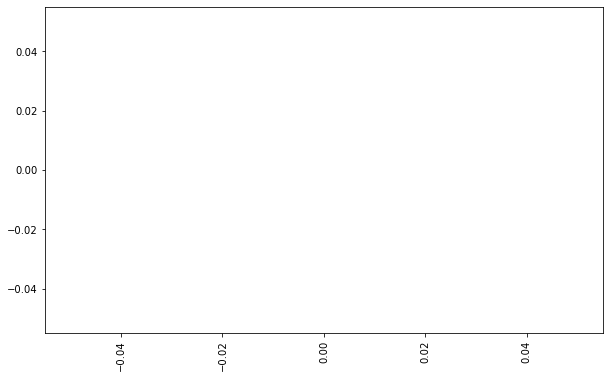

In [22]:
date_start_slider = widgets.SelectionSlider(
    options=pd.to_datetime(df_filterd['first_created_at']).sort_values().unique(),
    description='Start Date:',
    continuous_update=False
)

date_end_slider = widgets.SelectionSlider(
    options=pd.to_datetime(df_filterd['first_created_at']).sort_values().unique(),
    description='End Date:',
    continuous_update=False
)

def plot_event_counts(start_date, end_date):
    filtered_data = df_filterd[(df_filterd['event_name'] == 'ad_reward') & 
                               (df_filterd['first_created_at'] >= start_date) & 
                               (df_filterd['first_created_at'] <= end_date)]['event_n']
    event_counts = filtered_data.value_counts().sort_index()

    plt.figure(figsize=(10, 6))
    event_counts.plot(kind='bar')
    plt.title(f'Count of Event Counts for "ad_reward" from {start_date} to {end_date}')
    plt.xlabel('Event Count')
    plt.ylabel('Frequency')
    plt.xlim(0, 30)
    plt.show()

display(date_start_slider, date_end_slider)
widgets.interactive(plot_event_counts, start_date=date_start_slider, end_date=date_end_slider)


From the graph, we can see that the majority of users either did not watch the ads or watched them an average of 37 times.

This graph illustrates the frequency distribution of event date differences for the "session_start" event. It shows the count of event occurrences based on the difference in dates. The y-axis represents the frequency of event counts, while the x-axis displays the event count. 

In [23]:
date_start_slider = widgets.SelectionSlider(
    options=pd.to_datetime(df['first_created_at']).sort_values().unique(),
    description='Start Date:',
    continuous_update=False
)

date_end_slider = widgets.SelectionSlider(
    options=pd.to_datetime(df['first_created_at']).sort_values().unique(),
    description='End Date:',
    continuous_update=False
)

def plot_event_counts(start_date, end_date):
    filtered_data = df[(df['event_name'] == 'session_start') & (df['first_created_at'] >= start_date) & (df['first_created_at'] <= end_date)]['event_date_diff']
    event_counts = filtered_data.value_counts().sort_index()

    plt.figure(figsize=(10, 6))
    event_counts.plot(kind='bar')
    plt.title(f'Count of Event Counts for "event_date_diff" from {start_date} to {end_date}')
    plt.xlabel('Event Count')
    plt.ylabel('Frequency')
    plt.ylim(0, 500)
    plt.xlim(0, 45)
    plt.show()

display(date_start_slider, date_end_slider)
widgets.interactive(plot_event_counts, start_date=date_start_slider, end_date=date_end_slider)


SelectionSlider(continuous_update=False, description='Start Date:', options=(Timestamp('1970-02-08 00:00:00'),…

SelectionSlider(continuous_update=False, description='End Date:', options=(Timestamp('1970-02-08 00:00:00'), T…

interactive(children=(SelectionSlider(continuous_update=False, description='Start Date:', options=(Timestamp('…

We observe that the majority of users log in on a single day and that's it, but on average, they use the application for about 18 days.

This graph represents the frequency distribution of the number of active days ("eventevent_activity_day") for sessions starting in the application. It shows how many users had a certain number of active days

In [24]:
date_start_slider = widgets.SelectionSlider(
    options=pd.to_datetime(df['first_created_at']).sort_values().unique(),
    description='Start Date:',
    continuous_update=False
)

date_end_slider = widgets.SelectionSlider(
    options=pd.to_datetime(df['first_created_at']).sort_values().unique(),
    description='End Date:',
    continuous_update=False
)

def plot_event_counts(start_date, end_date):
    filtered_data = df[(df['event_name'] == 'session_start') & (df['first_created_at'] >= start_date) & (df['first_created_at'] <= end_date)]['eventevent_activity_day']
    event_counts = filtered_data.value_counts().sort_index()

    plt.figure(figsize=(10, 6))
    event_counts.plot(kind='bar')
    plt.title(f'Count of Event Counts for "eventevent_activity_day" from {start_date} to {end_date}')
    plt.xlabel('Event Count')
    plt.ylabel('Frequency')
    plt.ylim(0, 2000)
    plt.xlim(0, 30)
    plt.show()

display(date_start_slider, date_end_slider)
widgets.interactive(plot_event_counts, start_date=date_start_slider, end_date=date_end_slider)


SelectionSlider(continuous_update=False, description='Start Date:', options=(Timestamp('1970-02-08 00:00:00'),…

SelectionSlider(continuous_update=False, description='End Date:', options=(Timestamp('1970-02-08 00:00:00'), T…

interactive(children=(SelectionSlider(continuous_update=False, description='Start Date:', options=(Timestamp('…

We observe that users actively use the application for approximately 4 days on average (i.e., they have some events on those days).

Let's compose a query to view events for levels where the columns will represent the following data:

    user_pseudo_id: unique user id
    event_name: name of the event
    event_param_value: more detailed information about the level as we are considering the actual completion
    level_event_n: the number of completions for this event.

In [25]:
query_level_data = f"""
WITH events_2018 AS (
  SELECT * FROM `firebase-public-project.analytics_153293282.events_2018*`
)
, transformation_events_data AS (
  SELECT DISTINCT
    user_pseudo_id
    , TIMESTAMP_MICROS(event_timestamp) AS event_created_at
    , event_name
    , param.key AS event_param_key
    , param.value.string_value AS event_param_value
  FROM events_2018,
  UNNEST(event_params) AS param
)
SELECT DISTINCT
  user_pseudo_id
  , event_name
  , event_param_value
  , COUNT(event_created_at) AS level_event_n
FROM transformation_events_data
WHERE event_name LIKE "level_%" AND event_param_key = "level_name" AND event_param_value LIKE "level_%"
GROUP BY 1, 2, 3
"""
query_job_data = client.query(query_level_data)
df_data = query_job_data.to_dataframe()
df_data.to_csv('events_level_2018.csv', index=False)

In [26]:
df_data
desired_order = ['level_0', 'level_1', 'level_2', 'level_3', 'level_4', 'level_5', 'level_6', 'level_7', 'level_8', 'level_9', 'level_10', 'level_11', 'level_12', 'level_13', 'level_14', 'level_15', 'level_16', 'level_17', 'level_18', 'level_19', 'level_20', 'level_21', 'level_22', 'level_23', 'level_24', 'level_25', 'level_26', 'level_27', 'level_28', 'level_29', 'level_30'
]
df_data

,user_pseudo_id,event_name,event_param_value,level_event_n
0,257A35EA0A92B4B2F8FB4BA3F8B4C3D8,level_fail,level_0,1
1,2C84CF723999D48F8F069AFFC184C4DC,level_fail,level_0,11
2,9B18A1CBA96D52D05CFA7CB7C9011EDE,level_end,level_0,6
3,27AABF18BF07DE5DCACA40BDAFCD21E1,level_retry,level_31,1
4,7842C62D45ECE888132F21C9F4417B21,level_fail,level_0,1
...,...,...,...,...
141447,9756BD4A082BFDA01EEE6555ACBE81B1,level_complete,level_30,1
141448,5B4FD8662DAD71406319200659FDF420,level_up,level_30,1
141449,5B4FD8662DAD71406319200659FDF420,level_end,level_30,1
141450,A7150322DCE7EAD55B4461FBB6C1925A,level_up,level_30,1


This graph represents the distribution of users by level with the "level_start" event. Each bar represents the number of unique users associated with each level when the "level_start" event occurred.


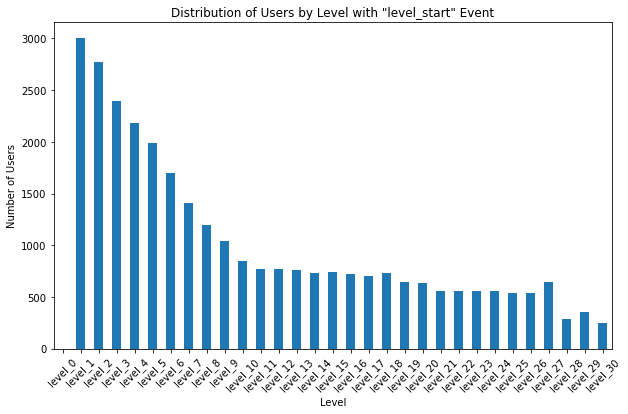

In [36]:
strat_data = df_data[df_data['event_name'] == 'level_start']

strat_counts = strat_data.groupby('event_param_value')['user_pseudo_id'].nunique()

strat_counts_sorted = strat_counts.reindex(desired_order)


plt.figure(figsize=(10, 6))
strat_counts_sorted.plot(kind='bar')
plt.title('Distribution of Users by Level with "level_start" Event')
plt.xlabel('Level')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.show()

We see that by the 10th level, one-third of the initial users reach it, and half of the users stop playing after the 6th level. Those who reach the 9th level mostly continue playing, but half of them give up at the 27th level.

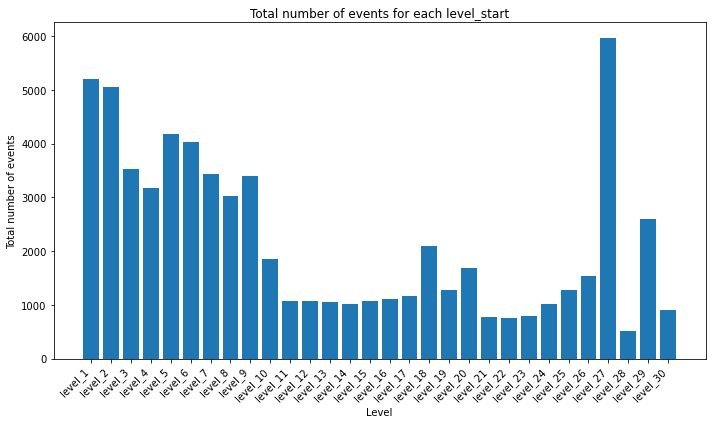

In [38]:
sum_by_param_value = df_data[df_data['event_name'] == 'level_start'].groupby('event_param_value')['level_event_n'].sum().reset_index(name='sum_level_event_n')

sum_by_param_value['event_param_value'] = pd.Categorical(sum_by_param_value['event_param_value'], categories=desired_order, ordered=True)

sum_by_param_value = sum_by_param_value.sort_values('event_param_value')

plt.figure(figsize=(10, 6))
plt.bar(sum_by_param_value['event_param_value'], sum_by_param_value['sum_level_event_n'])
plt.xlabel('Level')
plt.ylabel('Total number of events')
plt.title('Total number of events for each level_start')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

As we can see, there are a lot of attempts at level 27, approximately by 16% of the users who started playing, which is a very high number.

This code generates a bar chart illustrating the distribution of users by level for the "level_complete" event. It calculates the number of unique users for each level and then plots this information. The x-axis represents the levels, while the y-axis indicates the number of users.

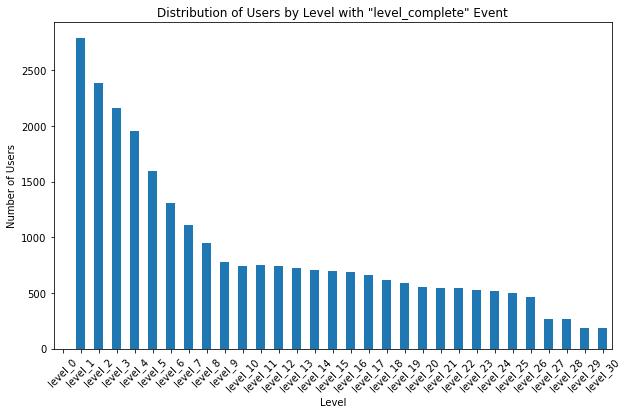

In [46]:
complete_data = df_data[df_data['event_name'] == 'level_complete']

complete_counts = complete_data.groupby('event_param_value')['user_pseudo_id'].nunique()

complete_counts_sorted = complete_counts.reindex(desired_order)


plt.figure(figsize=(10, 6))
complete_counts_sorted.plot(kind='bar')
plt.title('Distribution of Users by Level with "level_complete" Event')
plt.xlabel('Level')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.show()

It seems that the graphs for different levels of the "level_complete" event overlap or coincide.
    
This code calculates the total number of events for each level in the "level_complete" event. It groups the data by the level represented by the 'event_param_value' column, sums the corresponding 'level_event_n' values, and then sorts the data by the level order specified in the 'desired_order' list. Finally, it creates a bar chart to visualize the total number of events for each level, with the x-axis representing the levels and the y-axis representing the total number of events.

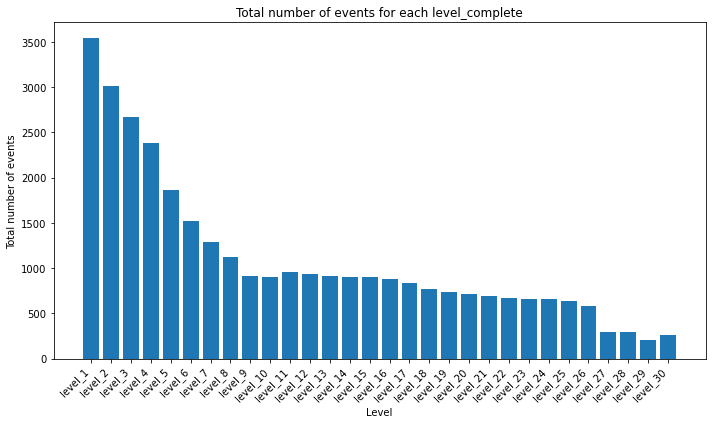

In [39]:
sum_by_param_value = df_data[df_data['event_name'] == 'level_complete'].groupby('event_param_value')['level_event_n'].sum().reset_index(name='sum_level_event_n')

sum_by_param_value['event_param_value'] = pd.Categorical(sum_by_param_value['event_param_value'], categories=desired_order, ordered=True)

sum_by_param_value = sum_by_param_value.sort_values('event_param_value')

plt.figure(figsize=(10, 6))
plt.bar(sum_by_param_value['event_param_value'], sum_by_param_value['sum_level_event_n'])
plt.xlabel('Level')
plt.ylabel('Total number of events')
plt.title('Total number of events for each level_complete')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

As we can see, some users retry levels multiple times

This code generates a bar chart showing the distribution of users by level for the "level_fail" event. It first filters the data to select only rows where the event name is "level_fail". Then, it calculates the number of unique users for each level and sorts them according to the desired order. Finally, it plots the data as a bar chart with the level on the x-axis and the number of users on the y-axis.

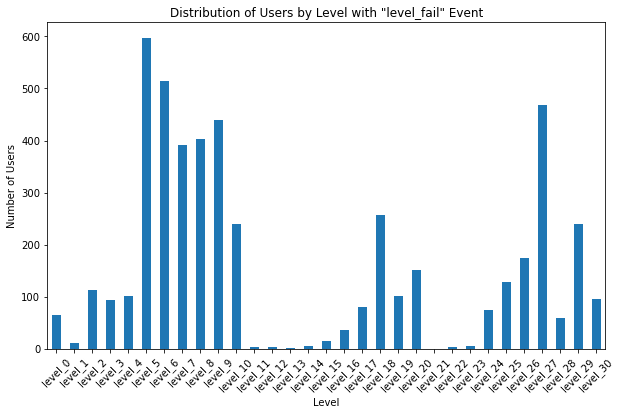

In [33]:
fail_data = df_data[df_data['event_name'] == 'level_fail']

fail_counts = fail_data.groupby('event_param_value')['user_pseudo_id'].nunique()

fail_counts_sorted = fail_counts.reindex(desired_order)


plt.figure(figsize=(10, 6))
fail_counts_sorted.plot(kind='bar')
plt.title('Distribution of Users by Level with "level_fail" Event')
plt.xlabel('Level')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.show()


This graph shows that there are a large number of failed attempts at the initial and final levels, with the number of users being significantly lower at the latter levels. At the same time, player activity in later levels may be more intense as they strive to complete the game.

This code is used to create a graph that shows the total number of events for each level where users failed to complete the level ("level_fail" event). The number of events is summed for each level and plotted as bars, with each bar representing a specific level.

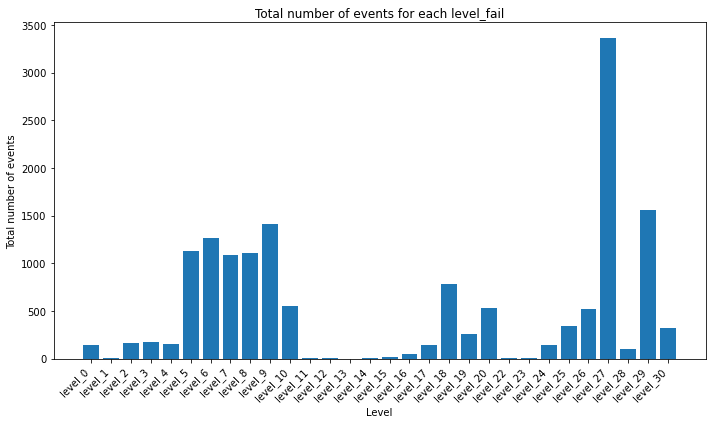

In [40]:
sum_by_param_value = df_data[df_data['event_name'] == 'level_fail'].groupby('event_param_value')['level_event_n'].sum().reset_index(name='sum_level_event_n')

sum_by_param_value['event_param_value'] = pd.Categorical(sum_by_param_value['event_param_value'], categories=desired_order, ordered=True)

sum_by_param_value = sum_by_param_value.sort_values('event_param_value')

plt.figure(figsize=(10, 6))
plt.bar(sum_by_param_value['event_param_value'], sum_by_param_value['sum_level_event_n'])
plt.xlabel('Level')
plt.ylabel('Total number of events')
plt.title('Total number of events for each level_fail')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

This code visualizes the distribution of users by level when the "level_reset" event occurs. It counts the number of unique users for each level and creates a bar plot to show the distribution. The x-axis represents the levels, while the y-axis represents the number of users.

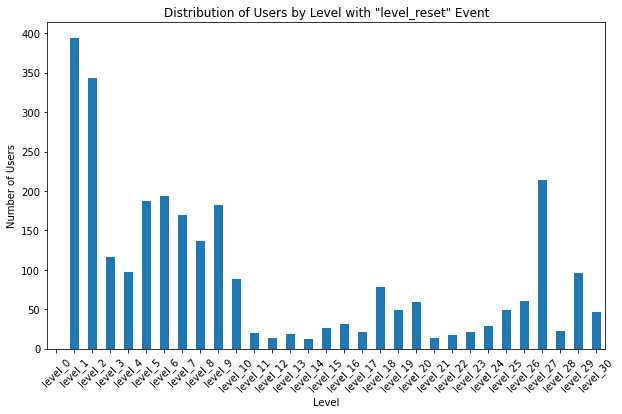

In [49]:
reset_data = df_data[df_data['event_name'] == 'level_reset']

reset_counts = reset_data.groupby('event_param_value')['user_pseudo_id'].nunique()

reset_counts_sorted = reset_counts.reindex(desired_order)


plt.figure(figsize=(10, 6))
reset_counts_sorted.plot(kind='bar')
plt.title('Distribution of Users by Level with "level_reset" Event')
plt.xlabel('Level')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.show()


As we can see, there are a lot of resets by users at the initial levels and at level 26.

This code generates a bar chart showing the total number of events for each level_reset event. It filters the DataFrame to include only rows where the event_name is 'level_reset'. Then, it groups the data by the event_param_value (representing the level) and calculates the sum of the level_event_n for each level. The resulting DataFrame is sorted by the level in the desired order. Finally, a bar plot is created using Matplotlib to visualize the total number of events for each level_reset, with proper labeling and formatting.

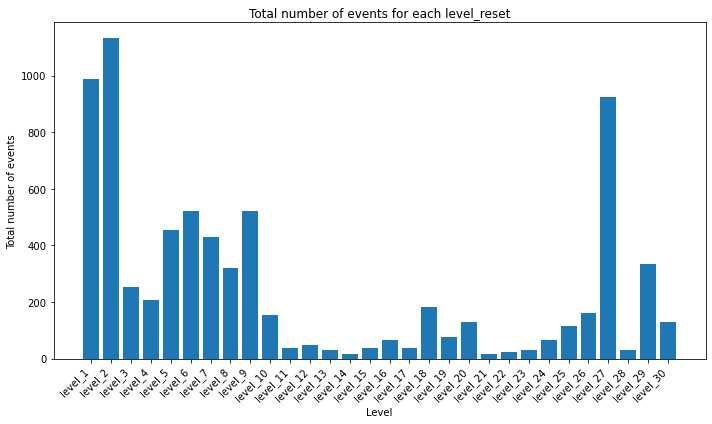

In [42]:
sum_by_param_value = df_data[df_data['event_name'] == 'level_reset'].groupby('event_param_value')['level_event_n'].sum().reset_index(name='sum_level_event_n')

sum_by_param_value['event_param_value'] = pd.Categorical(sum_by_param_value['event_param_value'], categories=desired_order, ordered=True)

sum_by_param_value = sum_by_param_value.sort_values('event_param_value')

plt.figure(figsize=(10, 6))
plt.bar(sum_by_param_value['event_param_value'], sum_by_param_value['sum_level_event_n'])
plt.xlabel('Level')
plt.ylabel('Total number of events')
plt.title('Total number of events for each level_reset')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

This code generates a bar chart showing the distribution of users by level for the "level_retry" event. It first filters the DataFrame to include only rows where the event_name is 'level_retry'. Then, it groups the data by the event_param_value (representing the level) and calculates the number of unique users (user_pseudo_id) for each level.

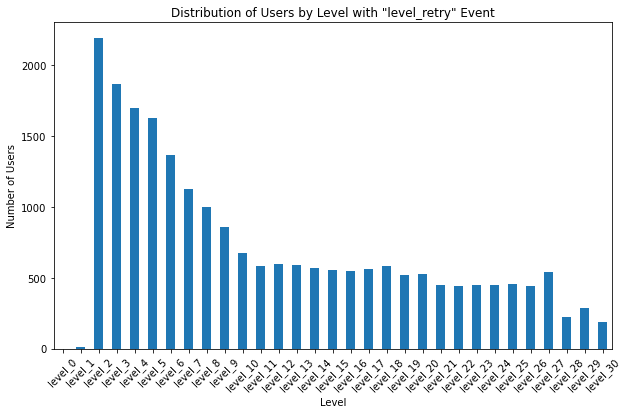

In [35]:
retry_data = df_data[df_data['event_name'] == 'level_retry']

retry_counts = retry_data.groupby('event_param_value')['user_pseudo_id'].nunique()

retry_counts_sorted = retry_counts.reindex(desired_order)


plt.figure(figsize=(10, 6))
retry_counts_sorted.plot(kind='bar')
plt.title('Distribution of Users by Level with "level_retry" Event')
plt.xlabel('Level')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.show()


    1)It's noticeable that one-third of the users are focused on completing the game entirely, particularly evident after the 8th level.
    
    2)At the 6th level stage, half of the users drop off.
    
    3)Most users play for just one day, but on average, they are active for four days.
    
    4)Levels 27 and 29 appear to be the most challenging, as they have the highest number of failures relative to the remaining users, as well as the total number of attempts. Approximately one-sixth of users manage to complete the game.
    
    5)On average, there are 37 ad views.

From the data in BQ, we see that the tables are stored for one day, to some extent they are partitioned, and each of them can be accessed separately. There are such main columns as:

    event_date: date of the event in string format
    event_timestamp: date with time
    event_name: name of the event
    event_params: event parameters describing in more detail what is happening (RECORD)
    user_pseudo_id: user identifier
    user_properties: information about the user (RECORD)
    user_first_touch_timestamp: first usage
    user_ltv: everything related to various purchases (RECORD)
    device: everything about the devices from which the user logs in (RECORD)
    geo: information about the user's location (RECORD)
    app_info: information about the application (RECORD)